In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
%matplotlib inline



In [2]:
exams = pd.read_csv("exams.csv")
qt_keys = pd.read_csv("q_type_keys.csv")
os_keys = pd.read_csv("os_topic_keys.csv")

In [3]:
exams

,exam,total_points
0,08-fall-mid,100
1,09-fall-mid,120
2,09-spring-mid,100
3,10-spring-final,100
4,11-fall-final,100
5,11-fall-mid,110
6,11-spring-mid,80
7,12-spring-mid,150
8,13-fall-mid,160
9,18-spring-final,79


In [5]:
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    print(curr_exam)
#     print(curr_exam)
#     curr_exam = curr_exam[[curr_exam.columns.tolist()[0],curr_exam.columns.tolist()[2],curr_exam.columns.tolist()[7]]]# +curr_exam[curr_exam.columns.tolist()[2]]+curr_exam[curr_exam.columns.tolist()[7]]
#     curr_exam.columns = ['question_type','gpt3.5_pts_earned', 'bard_pts_earned', 'gpt4_pts_earned']
#     print(curr_exam)
    curr_exam.to_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv', index = False)

08-fall-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  gpt4_pts_earned
0            cm        m                 10              6.5               25
1             m        p                  6              4.0               13
2            md        m                 13             12.0               20
3            ds        f                  8              6.0                4


ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [ ]:
#cols: gpt3.5_overall, gpt3.5_math, etc..

In [6]:
qt_keys

,character,category
0,c,Code
1,d,Drawing/Chart
2,m,Math
3,q,Multiple Choice
4,s,Short Answer


In [9]:
os_keys

,character,category
0,p,Process Management
1,m,Memory Mangagement
2,f,File Systems
3,d,Device Management
4,s,Synchronization and Concurrency


In [7]:
#gpt performance
columns = qt_keys['category'].tolist()
columns.append('overall')


In [16]:
gpt35_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gpt3.5_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gpt3.5_pts_earned'].sum()/exams.iat[i,1])
    
    gpt35_df.loc[len(gpt35_df.index)] = l
#         print(tmp)
    

08-fall-mid
09-fall-mid
09-spring-mid
10-spring-final
11-fall-final
11-fall-mid
11-spring-mid
12-spring-mid
13-fall-mid
18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [18]:
gpt35_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.400000,0.420000,0.386667,NaN,0.320000,0.370000
1,0.750000,0.450000,0.466667,NaN,0.590000,0.625000
2,0.375000,NaN,0.487500,NaN,0.533333,0.540000
3,0.727778,NaN,0.350000,NaN,NaN,0.705000
4,NaN,NaN,0.250000,NaN,NaN,0.250000
5,0.540000,NaN,0.060000,NaN,0.657143,0.531818
6,NaN,0.362500,0.297500,NaN,NaN,0.362500
7,0.650000,NaN,0.100000,NaN,0.810714,0.763333
8,0.430000,0.000000,0.320000,NaN,0.542308,0.490625
9,0.818182,0.482759,0.407407,0.518987,NaN,0.518987


In [11]:
bard_df = pd.DataFrame(columns = columns)

In [12]:
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += int(tmp.loc[j]['bard_pts_earned']) if not np.isnan(tmp.loc[j]['bard_pts_earned']) else 0
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['bard_pts_earned'].sum()/exams.iat[i,1])
    
    bard_df.loc[len(bard_df.index)] = l

08-fall-mid
09-fall-mid
09-spring-mid
10-spring-final
11-fall-final
11-fall-mid
11-spring-mid
12-spring-mid
13-fall-mid
18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [19]:
bard_df


,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.240000,0.360000,0.293333,NaN,0.240000,0.285000
1,0.600000,0.433333,0.516667,NaN,0.520000,0.533333
2,0.200000,NaN,0.325000,NaN,0.266667,0.300000
3,0.655556,NaN,0.300000,NaN,NaN,0.620000
4,NaN,NaN,0.320000,NaN,NaN,0.330000
5,0.480000,NaN,0.360000,NaN,0.642857,0.588636
6,NaN,0.312500,0.262500,NaN,NaN,0.318750
7,1.000000,NaN,0.100000,NaN,0.700000,0.663333
8,0.580000,0.200000,0.340000,NaN,0.515385,0.515625
9,0.818182,0.482759,0.333333,0.455696,NaN,0.455696


In [20]:
gpt35_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.400000,0.420000,0.386667,NaN,0.320000,0.370000
1,0.750000,0.450000,0.466667,NaN,0.590000,0.625000
2,0.375000,NaN,0.487500,NaN,0.533333,0.540000
3,0.727778,NaN,0.350000,NaN,NaN,0.705000
4,NaN,NaN,0.250000,NaN,NaN,0.250000
5,0.540000,NaN,0.060000,NaN,0.657143,0.531818
6,NaN,0.362500,0.297500,NaN,NaN,0.362500
7,0.650000,NaN,0.100000,NaN,0.810714,0.763333
8,0.430000,0.000000,0.320000,NaN,0.542308,0.490625
9,0.818182,0.482759,0.407407,0.518987,NaN,0.518987


In [22]:
l = []
for col in gpt35_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gpt35_df.index)):
        if not np.isnan(gpt35_df[col][i]):
            curr_topic += gpt35_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gpt35_df.loc[len(gpt35_df.index)] = l

In [23]:
gpt35_df




,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.400000,0.420000,0.386667,NaN,0.320000,0.370000
1,0.750000,0.450000,0.466667,NaN,0.590000,0.625000
2,0.375000,NaN,0.487500,NaN,0.533333,0.540000
3,0.727778,NaN,0.350000,NaN,NaN,0.705000
4,NaN,NaN,0.250000,NaN,NaN,0.250000
5,0.540000,NaN,0.060000,NaN,0.657143,0.531818
6,NaN,0.362500,0.297500,NaN,NaN,0.362500
7,0.650000,NaN,0.100000,NaN,0.810714,0.763333
8,0.430000,0.000000,0.320000,NaN,0.542308,0.490625
9,0.818182,0.482759,0.407407,0.518987,NaN,0.518987


In [13]:
l = []
for col in bard_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(bard_df[col][i]):
            curr_topic += bard_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
bard_df.loc[len(bard_df.index)] = l

In [14]:
bard_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,0.240000,0.360000,0.293333,NaN,0.240000,0.285000
1,0.600000,0.433333,0.516667,NaN,0.520000,0.533333
2,0.200000,NaN,0.325000,NaN,0.266667,0.300000
3,0.655556,NaN,0.300000,NaN,NaN,0.620000
4,NaN,NaN,0.320000,NaN,NaN,0.330000
5,0.480000,NaN,0.360000,NaN,0.642857,0.588636
6,NaN,0.312500,0.262500,NaN,NaN,0.318750
7,1.000000,NaN,0.100000,NaN,0.700000,0.663333
8,0.580000,0.200000,0.340000,NaN,0.515385,0.515625
9,0.818182,0.482759,0.333333,0.455696,NaN,0.455696


In [8]:
gpt4_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += int(tmp.loc[j]['gpt4_pts_earned']) if not np.isnan(tmp.loc[j]['gpt4_pts_earned']) else 0
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gpt4_pts_earned'].sum()/exams.iat[i,1])
    
    gpt4_df.loc[len(gpt4_df.index)] = l

08-fall-mid
09-fall-mid
09-spring-mid
10-spring-final
11-fall-final
11-fall-mid
11-spring-mid
12-spring-mid
13-fall-mid
18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [9]:
l = []
for col in gpt4_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gpt4_df.index)):
        if not np.isnan(gpt4_df[col][i]):
            curr_topic += gpt4_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gpt4_df.loc[len(gpt4_df.index)] = l

In [10]:
gpt4_df

,Code,Drawing/Chart,Math,Multiple Choice,Short Answer,overall
0,1.000000,0.480000,0.773333,NaN,0.160000,0.620000
1,0.750000,0.583333,0.566667,NaN,0.670000,0.675000
2,0.250000,NaN,0.562500,NaN,0.533333,0.540000
3,0.755556,NaN,0.650000,NaN,NaN,0.755000
4,NaN,NaN,0.430000,NaN,NaN,0.455000
5,0.480000,NaN,0.600000,NaN,0.771429,0.752273
6,NaN,0.512500,0.472500,NaN,NaN,0.525000
7,1.000000,NaN,0.100000,NaN,0.850000,0.803333
8,0.660000,0.200000,0.360000,NaN,0.592308,0.609375
9,0.727273,0.655172,0.592593,0.607595,NaN,0.607595


In [24]:
gpt35_df.to_csv('gpt35_scores.csv', index = False)
bard_df.to_csv('bard_scores.csv', index = False)
gpt4_df.to_csv('gpt4_scores.csv', index = False)

In [4]:
gpt35_df = pd.read_csv('gpt35_scores.csv')
bard_df = pd.read_csv('bard_scores.csv')
gpt4_df = pd.read_csv('gpt4_scores.csv')

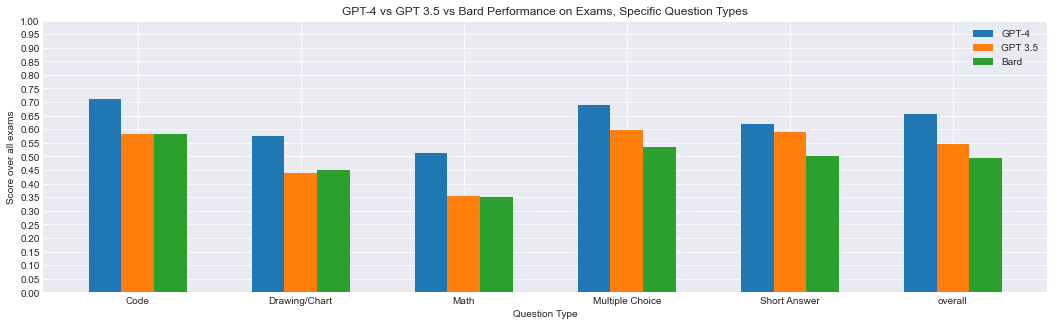

In [5]:
xax = np.arange(len(bard_df.loc[13].tolist()))
gpt = gpt35_df.loc[13]
b = bard_df.loc[13]
g4 = gpt4_df.loc[13]
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(xax-0.2, g4, 0.2, label = 'GPT-4')
plt.bar(xax, gpt, 0.2, label = 'GPT 3.5')
plt.bar(xax + 0.2, b, 0.2, label = 'Bard')

plt.xticks(xax, bard_df.columns)
plt.yticks(np.arange(0,1.05,0.05))
plt.xlabel("Question Type")
plt.ylabel("Score over all exams")
plt.title("GPT-4 vs GPT 3.5 vs Bard Performance on Exams, Specific Question Types")

plt.legend()
plt.savefig('qtype_overall.png')
plt.show()

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


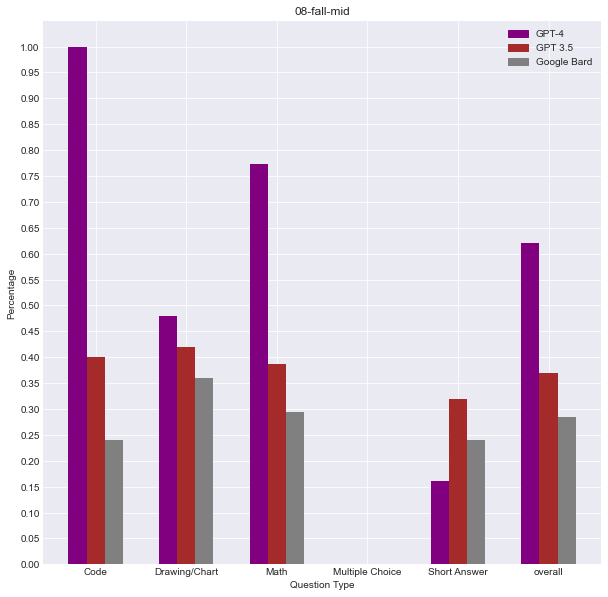

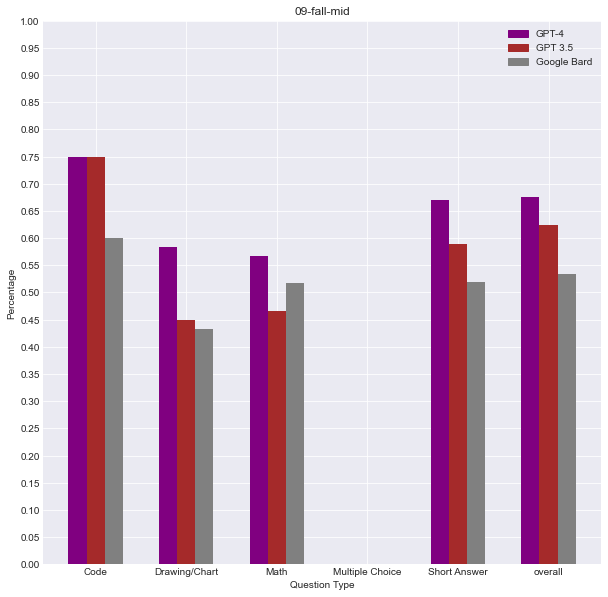

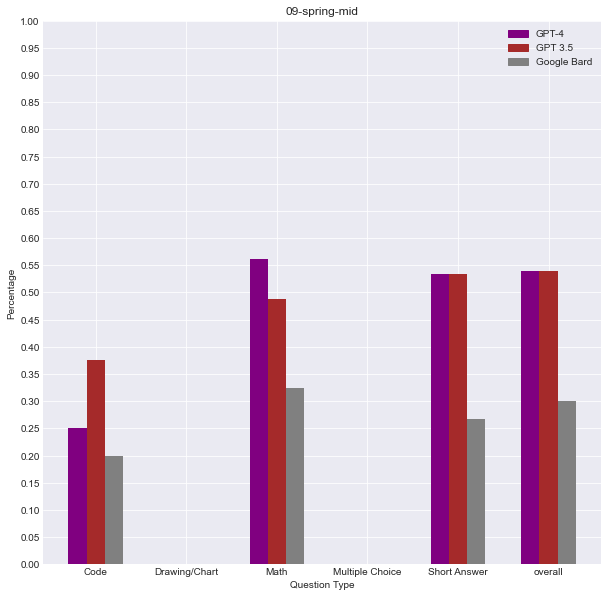

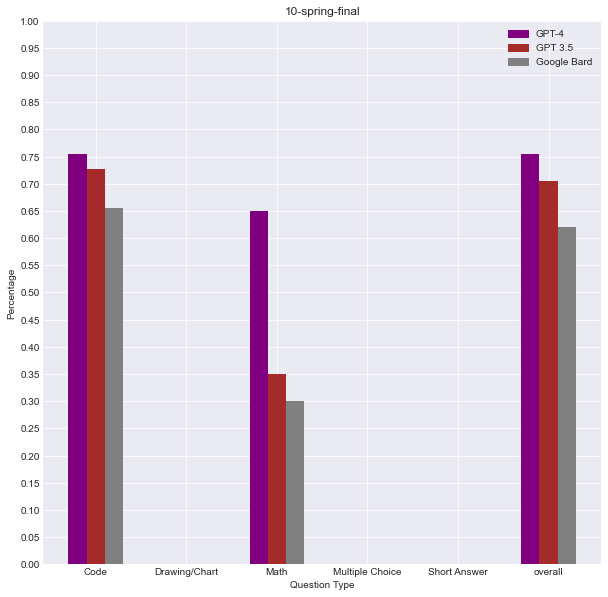

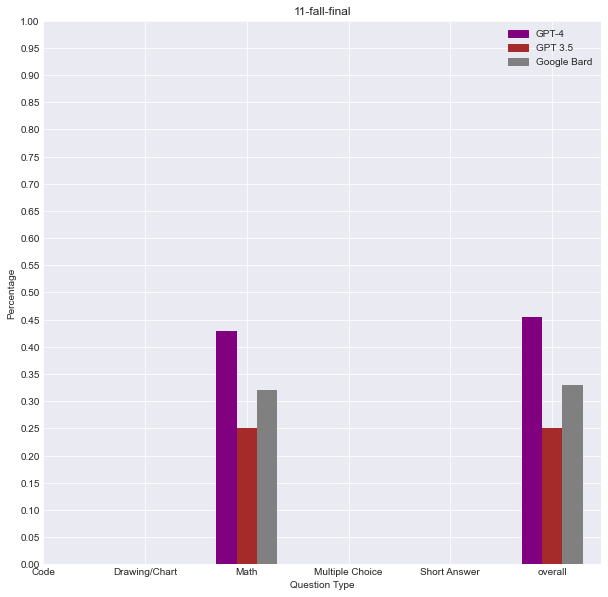

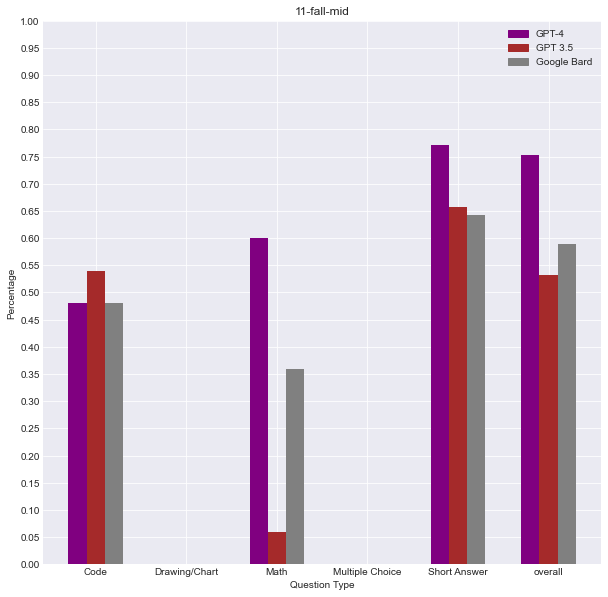

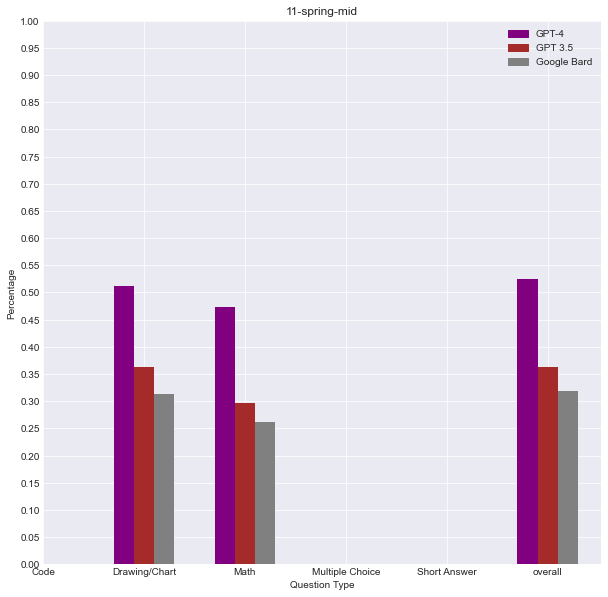

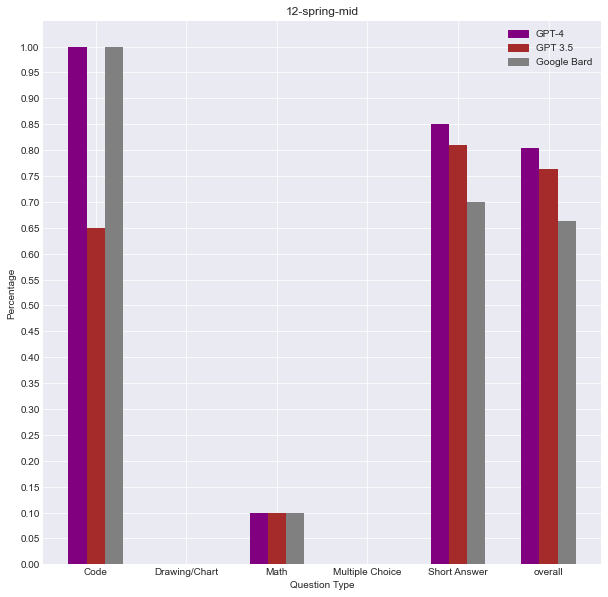

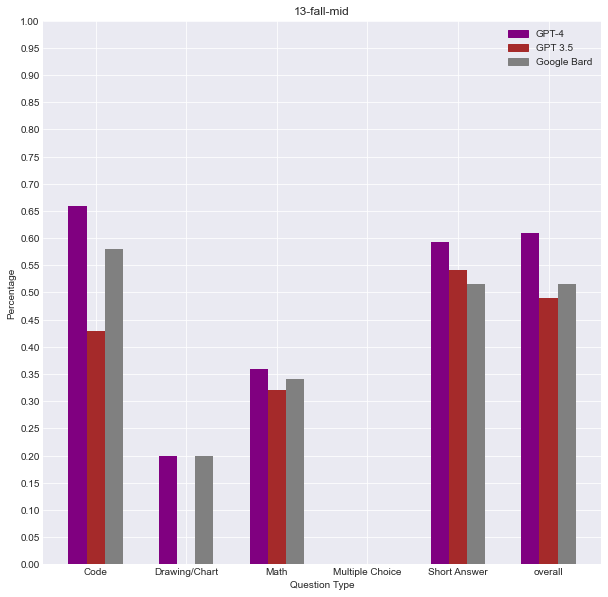

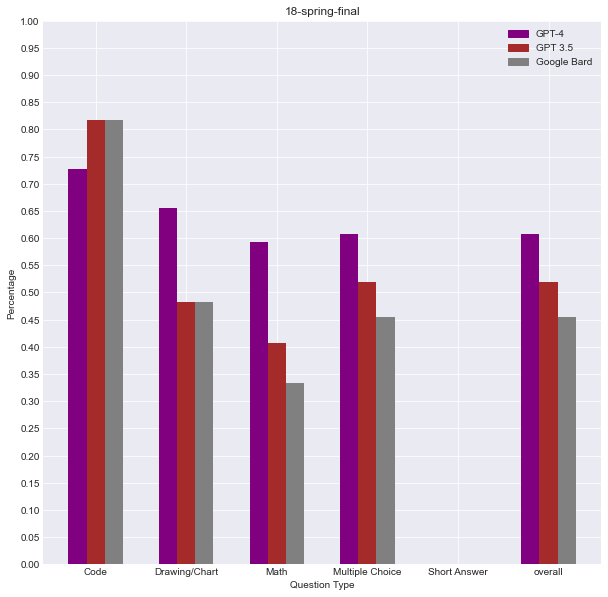

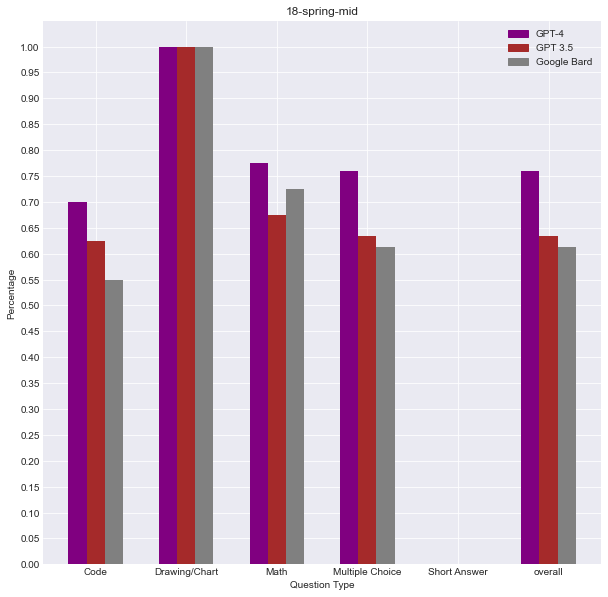

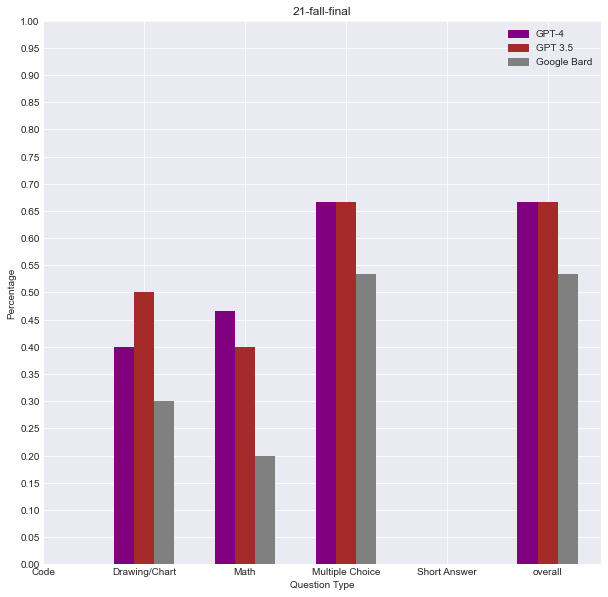

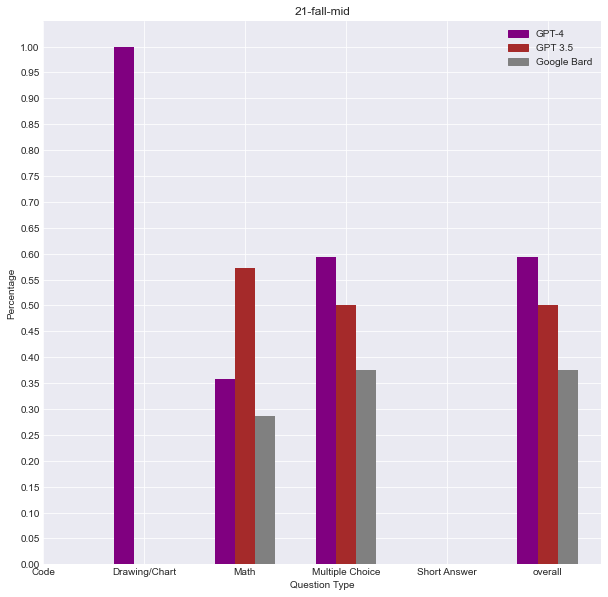

In [6]:
#graph
for i in range(13):
#     ax = axs[i]
#     matplotlib.style.use("tomato")
    fig, ax = plt.subplots(1,1)
    
    xax = np.arange(len(bard_df.loc[i]))#[~np.isnan(bard_df.loc[i])].tolist()))
    print(xax)
    gpt = gpt35_df.loc[i]
    b = bard_df.loc[i]
    g4 = gpt4_df.loc[i]
    ax.figure.set_size_inches(10, 10)
#     ax.figure(figsize=(18, 5))
#     ax.style.use('seaborn-darkgrid')
    plt.bar(xax-0.2, g4, 0.2, label = 'GPT-4', color = "purple")
    ax.bar(xax, gpt, 0.2, label = 'GPT 3.5', color = "brown")
    ax.bar(xax + 0.2, b, 0.2, label = 'Bard', color = "grey")
    
#     print(bard_df.loc[1][~np.isnan(bard_df.loc[1])].index.tolist())

    ax.set_xticks(xax, bard_df.loc[i].index.tolist())
    ax.set_xlabel("Question Type")
    plt.yticks(np.arange(0,1.05,0.05))
    ax.set_ylabel("Percentage")    
    ax.set_title(exams.iat[i,0])
    ax.legend(handles = [mpatches.Patch(color='purple', label='GPT-4'),mpatches.Patch(color='brown', label='GPT 3.5'),mpatches.Patch(color='grey', label='Google Bard')])

        
    fig.savefig(exams.iat[i,0]+'.png')
    
    
    